In [ ]:
import pandas as pd
import chart_studio.plotly as py
import plotly.express as px
import math
import sys
import json
import argparse
import pandas as pd
import numpy as np
import scipy.signal as signal
from sklearn import decomposition, preprocessing  
from mpl_toolkits.mplot3d import Axes3D  
import cv2
import matplotlib.pyplot as plt

In [ ]:
def load_csi(filepath):
  filepath= '/Users/aayush/Aayush/WiFi_Sensing_2.0/dataset/' + filepath
  df = pd.read_csv(filepath)

  df_csi = df.loc[:, ['len', 'CSI_DATA']]
  drop_idx = []
  for i in range(df_csi.shape[0]):
    if df_csi.iloc[i]['len'] < 384:
      drop_idx.append(i)

  df_csi = df_csi.drop(drop_idx)
  size_x = len(df_csi.index)
  size_y = df_csi.iloc[0]['len']//2 # no. of subcarriers ..

  array_csi = np.zeros([size_x, size_y], dtype = np.complex64)

  for x , csi in enumerate(df_csi.iloc):
      temp = csi["CSI_DATA"].replace(' ', ',')
      temp = temp.replace(',]', ']')
      csi_raw_data = json.loads(temp)
      for y in range(0, len(csi_raw_data), 2):
          array_csi[x][y//2] = complex(csi_raw_data[y], csi_raw_data[y + 1])  # IQ channel frequency response
  array_csi_modulus = abs(array_csi) 
  return array_csi_modulus


def plot_csi(array_csi_modulus, title):
  df = pd.DataFrame(array_csi_modulus[:,:64], columns=range(64))

  fig = px.line(df, y = list(range(64)),
                title="CSI Magnitude (LLTF) - " + title
              
             )
  fig.show()
def plot_csi_htltf(array_csi_modulus, title):
    df = pd.DataFrame(array_csi_modulus[:,64:128], columns=range(64))

    fig = px.line(df, y = list(range(64)),
                  title="CSI Magnitude (HT-LTF) - " + title
                
              )
    fig.show()

In [31]:
plot_csi(load_csi("room1/los.csv"), "LOS")

# LLTF CSI MAGNITUDE (6 Samples)

In [32]:
plot_csi(load_csi("no_person.csv"), "Without Person")
plot_csi(load_csi("with_person_no_movement.csv"),"With Person")
#plot_csi(load_csi("spot7.csv"),"spot7.csv")

FileNotFoundError: [Errno 2] No such file or directory: '/Users/aayush/Aayush/WiFi_Sensing_2.0/dataset/no_person.csv'

# HTLTF CSI Magnitude (6 Samples)

In [ ]:
plot_csi_htltf(load_csi("no_person.csv"),"Without Person")
plot_csi_htltf(load_csi("with_person_no_movement.csv"),"With Person")


Text(0.5, 1.0, 'No Movement')

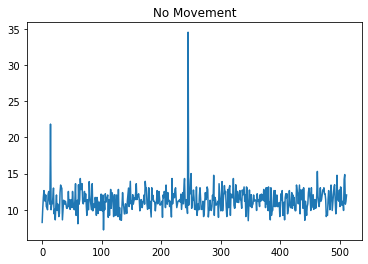

Text(0.5, 1.0, 'Walking')

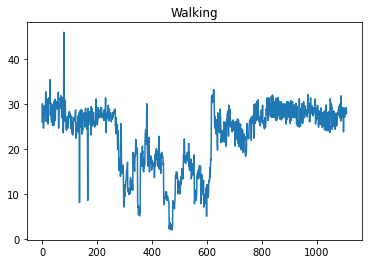

In [ ]:
array_magnitude = load_csi("room1/walk2.csv")
plt.plot(array_magnitude[:,6])
plt.title("Walking")

Text(0.5, 1.0, 'Sitting')

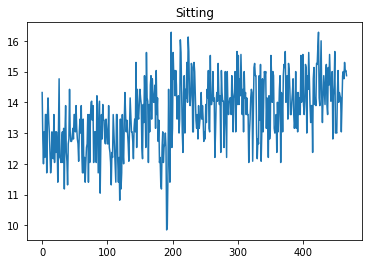

In [ ]:
array_magnitude = load_csi("room1/sit.csv")
plt.plot(array_magnitude[:-10,6])
plt.title("Sitting")

Text(0.5, 1.0, 'blocked')

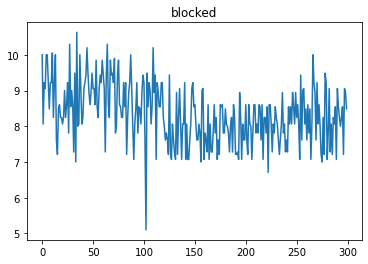

In [ ]:
array_magnitude = load_csi("CSI_DATA/room2/blocked.csv")
plt.plot(array_magnitude[:300,6])
plt.title("blocked")

Text(0.5, 1.0, 'Not blocked')

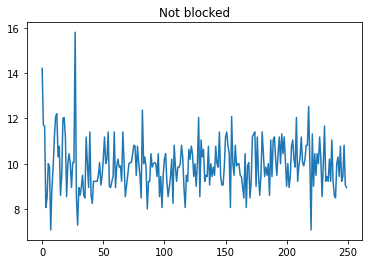

In [ ]:
array_magnitude = load_csi("CSI_DATA/room2/not_blocked.csv")
plt.plot(array_magnitude[200:450,6])
plt.title("Not blocked")

Text(0.5, 1.0, 'LOS Movements')

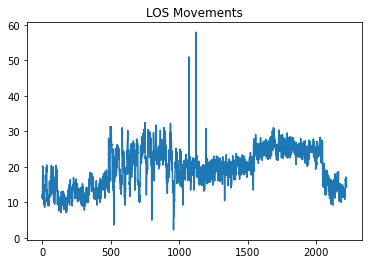

In [ ]:
array_magnitude = load_csi("room1/los2.csv")
plt.plot(array_magnitude[:,6])
plt.title("LOS Movements")

Text(0.5, 1.0, 'NLOS Movements')

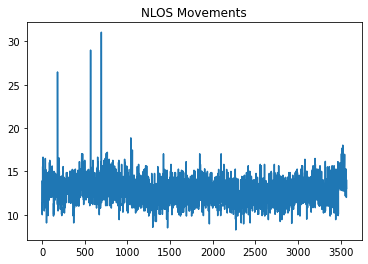

In [ ]:
array_magnitude = load_csi("room1/nlos.csv")
plt.plot(array_magnitude[:,6])
plt.title("NLOS Movements")

21.124002

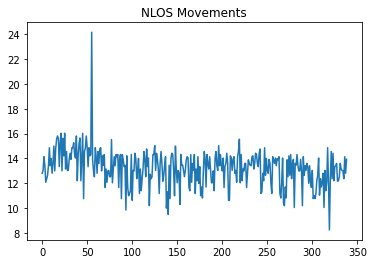

In [ ]:
array_magnitude = load_csi("room1/sit3.csv")
plt.plot(array_magnitude[:,6])
plt.title("NLOS Movements")
np.mean(array_magnitude[:,:])

22.596315

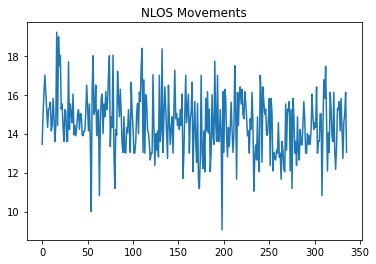

In [ ]:
array_magnitude = load_csi("room1/stand.csv")
plt.plot(array_magnitude[:,6])
plt.title("NLOS Movements")
np.mean(array_magnitude[:,:])

21.489693

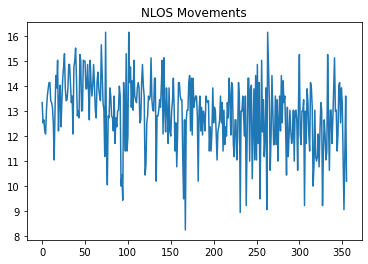

In [ ]:
array_magnitude = load_csi("room1/sit4.csv")
plt.plot(array_magnitude[:,6])
plt.title("NLOS Movements")
np.mean(array_magnitude[:,:])

23.040693

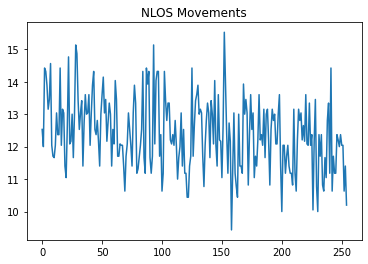

In [ ]:
array_magnitude = load_csi("room1/stand2.csv")
plt.plot(array_magnitude[:,6])
plt.title("NLOS Movements")
np.mean(array_magnitude[:,:])

18.771236

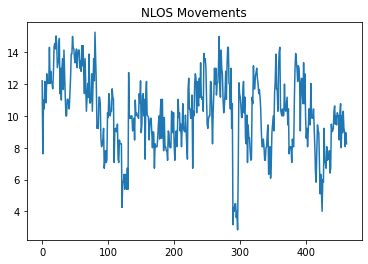

In [ ]:
array_magnitude = load_csi("room1/walk3.csv")
plt.plot(array_magnitude[:,6])
plt.title("NLOS Movements")
np.mean(array_magnitude[:,:])


17.942375

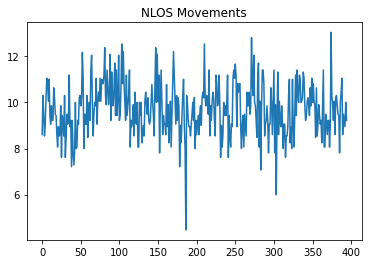

In [ ]:
array_magnitude = load_csi("room1/still1.csv")
plt.plot(array_magnitude[:,6])
plt.title("NLOS Movements")
np.mean(array_magnitude[:,:])

19.200205

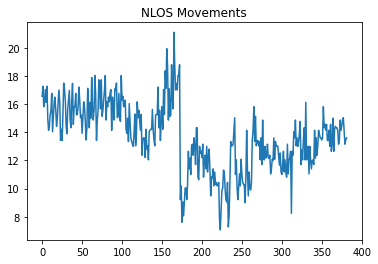

In [ ]:
array_magnitude = load_csi("room1/v2/walk3.csv")
plt.plot(array_magnitude[:,6])
plt.title("NLOS Movements")
np.mean(array_magnitude[:,:])

In [ ]:
array_magnitude.shape

(2, 192)

In [45]:
def load_csi1(filepath):
  filepath= '/Users/aayush/Aayush/WiFi_Sensing_2.0/ml/exp01/room1/' + filepath
  df = pd.read_csv(filepath)

  df_csi = df.loc[:, ['len', 'CSI_DATA']]
  drop_idx = []
  for i in range(df_csi.shape[0]):
    if df_csi.iloc[i]['len'] < 384:
      drop_idx.append(i)

  df_csi = df_csi.drop(drop_idx)
  size_x = len(df_csi.index)
  size_y = df_csi.iloc[0]['len']//2 # no. of subcarriers ..

  array_csi = np.zeros([size_x, size_y], dtype = np.complex64)

  for x , csi in enumerate(df_csi.iloc):
      temp = csi["CSI_DATA"].replace(' ', ',')
      temp = temp.replace(',]', ']')
      csi_raw_data = json.loads(temp)
      for y in range(0, len(csi_raw_data), 2):
          array_csi[x][y//2] = complex(csi_raw_data[y], csi_raw_data[y + 1])  # IQ channel frequency response
  array_csi_modulus = abs(array_csi) 
  return array_csi_modulus

Text(0.5, 1.0, 'NLOS Movements')

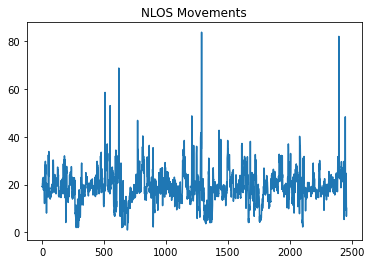

In [51]:
array_magnitude = load_csi1("walk1.csv")
plt.plot(array_magnitude[:,6])
plt.title("NLOS Movements")